In [1]:
!pip install -q langchain_community
!pip install -q replicate

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from langchain_community.llms import Replicate
import replicate
from google.colab import userdata
from IPython.display import Markdown, display
import os
import warnings
warnings.filterwarnings('ignore')

IBM Granite Vision Config

In [22]:
api_token = os.environ.get("REPLICATE_API_TOKEN")
assert api_token is not None, "API token is missing. Make sure it's set in the Colab secret environment."

client = replicate.Client(api_token=api_token)

def analyze_image_with_granite(image_path, prompt):
    with open(image_path, "rb") as img_file:
        output = client.run(
            "ibm-granite/granite-vision-3.3-2b",
            input={
                "image": img_file,
                "prompt": prompt,
                "temperature": 0.2,
                "top_p": 1.0,
                "max_tokens": 1000
            }
        )

    response = "".join(output).strip()
    display(Markdown(response))
    return response

Basic Information about the dataset

In [4]:
data = pd.read_csv("/content/drive/MyDrive/hactiv8/dataset.csv")
data.head()

,country,industry,ai_tool,adoption_rate,daily_active_users,year,user_feedback,age_group,company_size
0,USA,Technology,ChatGPT,40.45,2461,2023,YyvLXOFyevRMSvJtkXodLvgejiqQNvSOZfeeJASDOVTxwm...,35-44,Startup
1,France,Manufacturing,Midjourney,35.72,8496,2024,AdFVhenjthYSKJNzxzfaGQk wLnjRCgrHTyfXQEFjFJCMO...,18-24,Enterprise
2,Australia,Transportation,ChatGPT,13.47,8641,2024,zgNPmXBICRNbpjpTqIUWmMTeTYsInDNtAmzuxpDvcUZEAi...,45-54,Startup
3,UK,Manufacturing,ChatGPT,48.46,3488,2023,LxeKzQFbPvhxXUSgPVlLLJ pUFaicjCgiMtAmsTjovkrdE...,45-54,Enterprise
4,UK,Agriculture,Stable Diffusion,34.06,1124,2024,IOQtQoSKdSmiXRsUKpjXjXZgQohymFkVUvOASXlEnVsIOS...,45-54,SME


In [5]:
print('Dataset shape:', data.shape)
print('Data types:\n', data.dtypes)
print('Dataset details:\n', data.describe)

Dataset shape: (145000, 9)
Data types:
 country                object
industry               object
ai_tool                object
adoption_rate         float64
daily_active_users      int64
year                    int64
user_feedback          object
age_group              object
company_size           object
dtype: object
Dataset details:
 <bound method NDFrame.describe of           country        industry           ai_tool  adoption_rate  \
0             USA      Technology           ChatGPT          40.45   
1          France   Manufacturing        Midjourney          35.72   
2       Australia  Transportation           ChatGPT          13.47   
3              UK   Manufacturing           ChatGPT          48.46   
4              UK     Agriculture  Stable Diffusion          34.06   
...           ...             ...               ...            ...   
144995  Australia     Agriculture        Midjourney          86.93   
144996    Germany       Education        Midjourney          51.

Exploratory Data Analysis

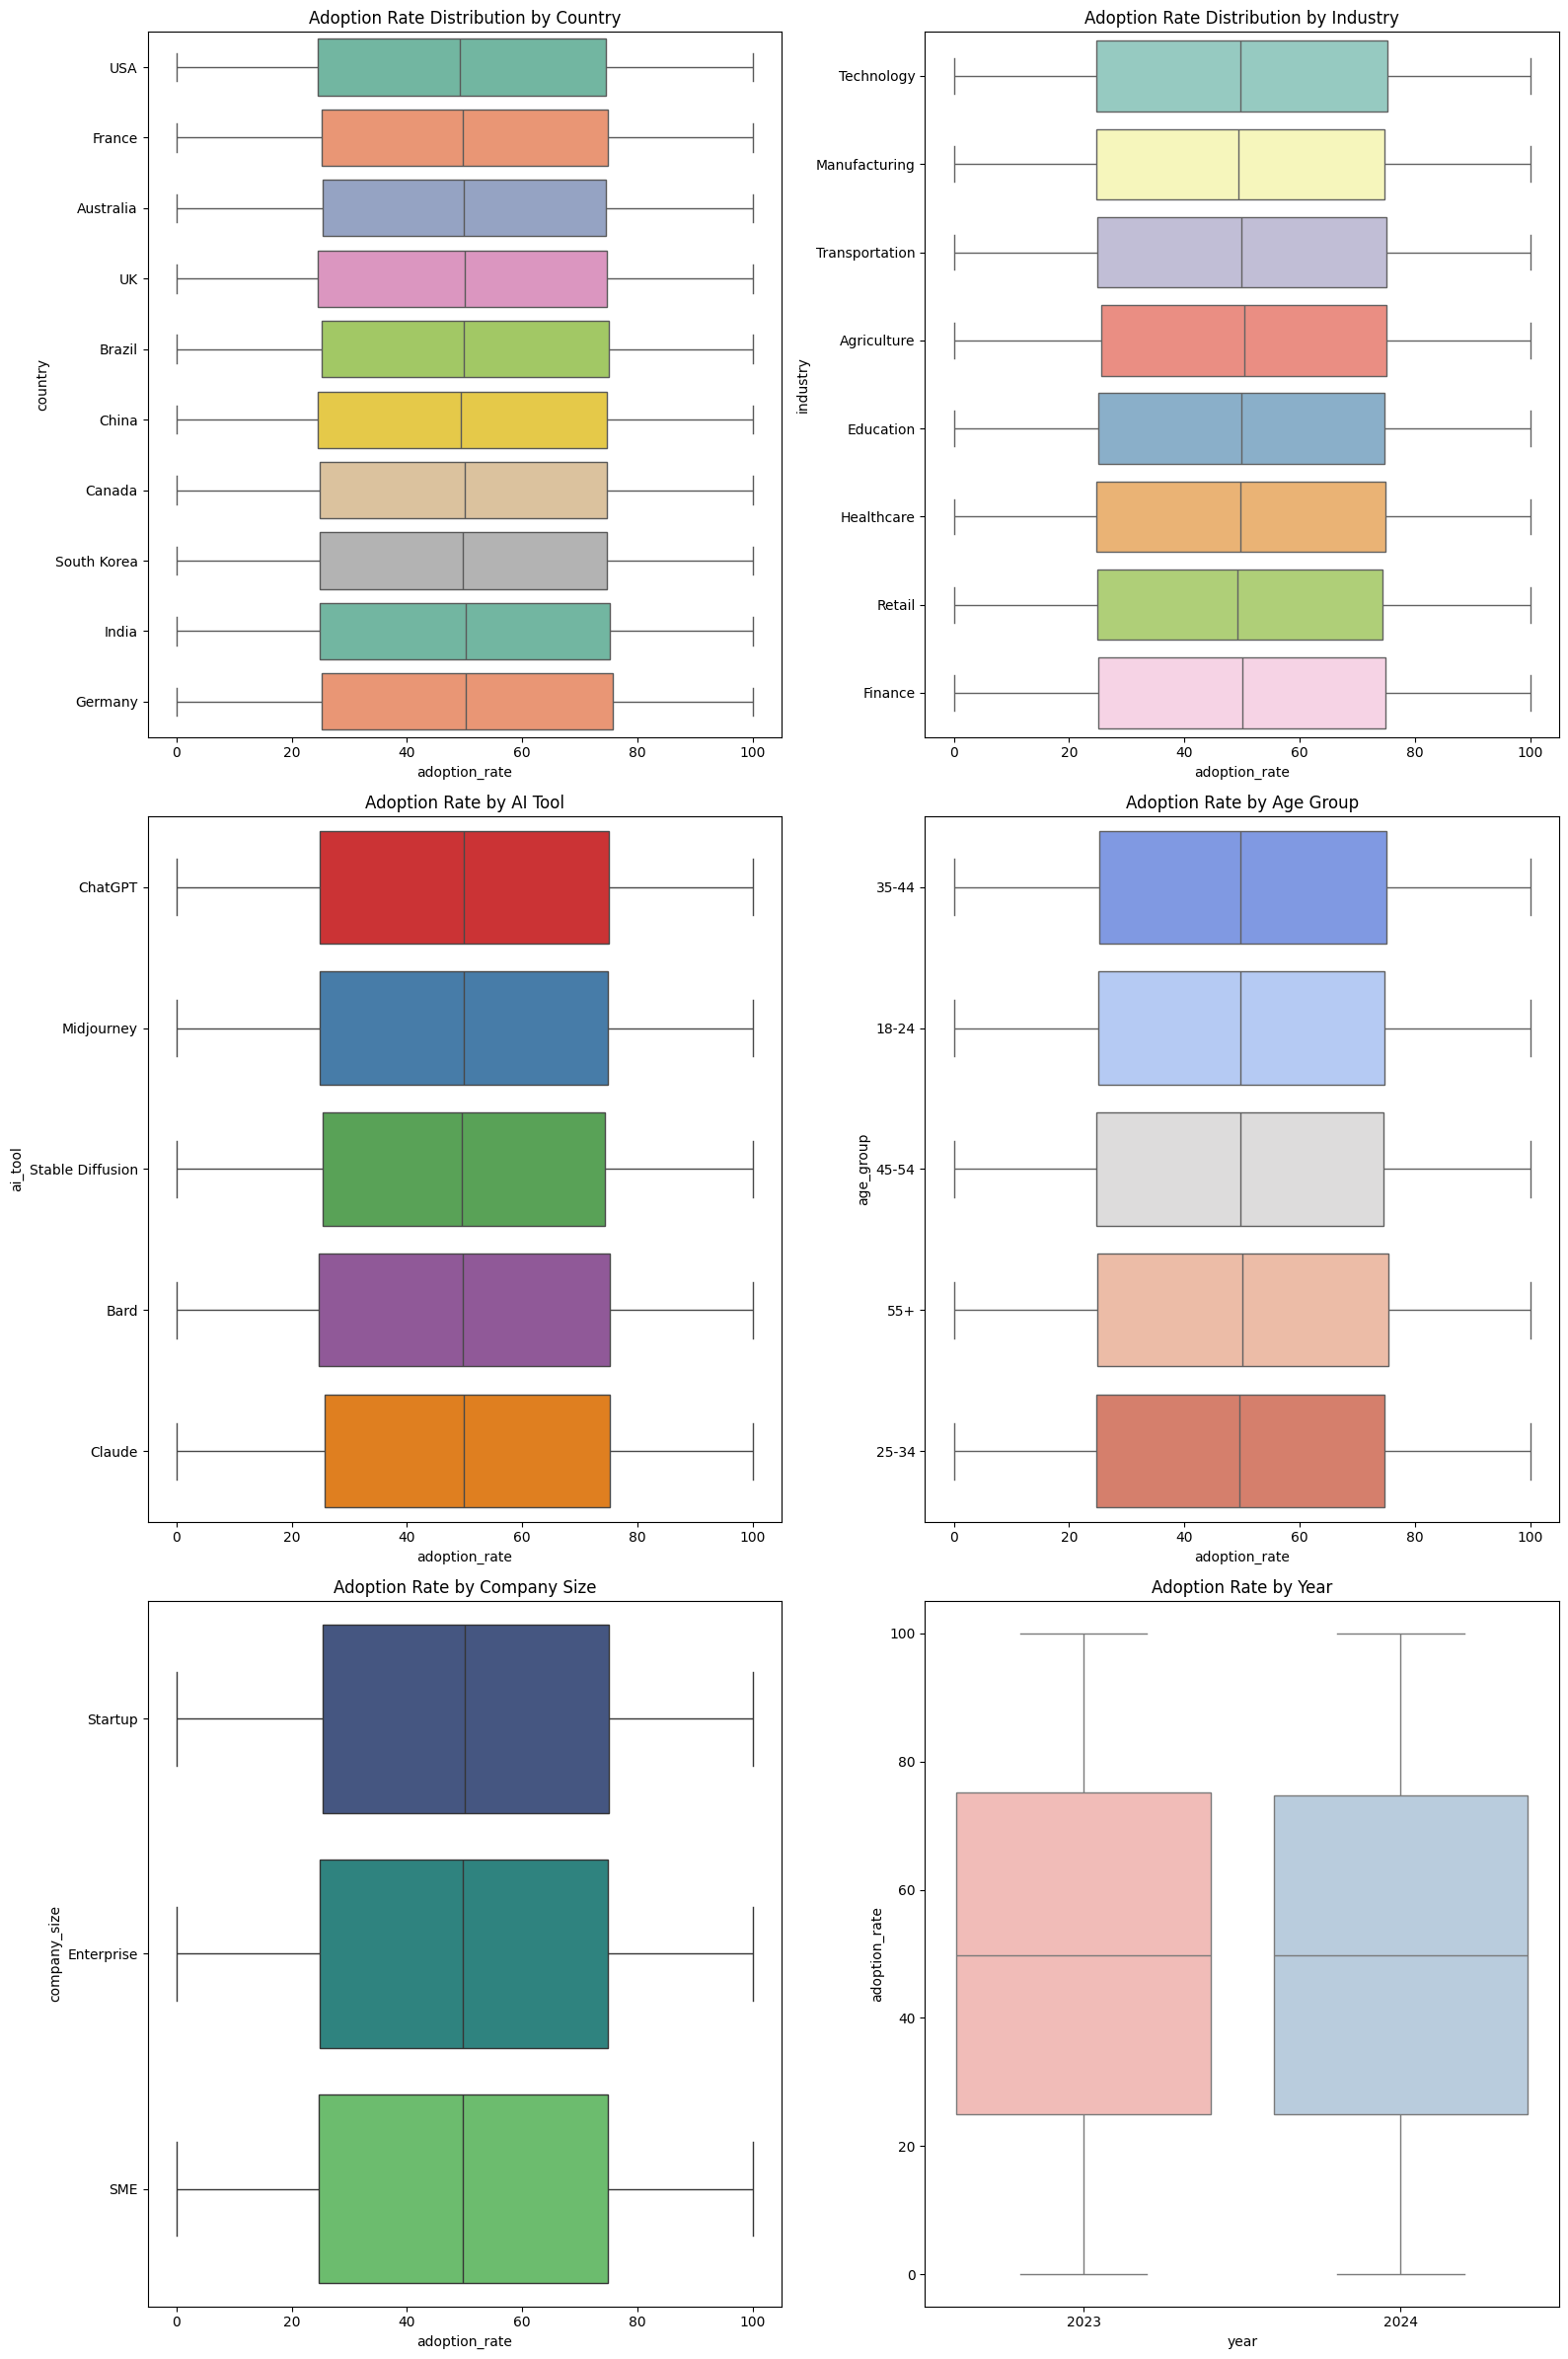

Based on the analysis of the boxplots, here are the detailed insights:

1. **Adoption Rate Distribution by Country:**
   - The country with the highest median adoption rate is the USA, with a median value around 60%.
   - The category with high variability is the "Retail" industry, showing a wide spread of adoption rates.
   - The "Finance" category appears to have consistently low adoption rates across the group.

2. **Adoption Rate Distribution by Industry:**
   - The "Technology" industry has the highest median adoption rate, with a median value around 70%.
   - The "Agriculture" industry has the lowest median adoption rate, with a median value around 20%.
   - The "Healthcare" industry shows a moderate spread of adoption rates.

3. **Adoption Rate by AI Tool:**
   - The "ChatGPT" AI tool has the highest median adoption rate, with a median value around 80%.
   - The "Bard" AI tool has the lowest median adoption rate, with a median value around 30%.
   - The "Stable Diffusion" AI tool shows a moderate spread of adoption rates.

4. **Adoption Rate by Age Group:**
   - The "35-44" age group has the highest median adoption rate, with a median value around 70%.
   - The "18-24" age group has the lowest median adoption rate, with a median value around 30%.
   - The "45-64" age group shows a moderate spread of adoption rates.

5. **Adoption Rate by Company Size:**
   - The "Startup" company size has the highest median adoption rate, with a median value around 80%.
   - The "SME" company size has the lowest median adoption rate, with a median value around 30%.
   - The "Enterprise" company size shows a moderate spread of adoption rates.

6. **Adoption Rate by Year:**
   - The year 2023 shows a high median adoption rate, with a median value around 70%.
   - The year 2024 shows a lower median adoption rate, with a median value around 50%.
   - There is a noticeable decline in adoption rates from 2023 to 2024.

**Overall Insights:**
- The "USA" country appears to be leading in AI adoption.
- There is a trend of increasing adoption rates over time, with a decline in 2024.
- AI companies should prioritize the "Technology" industry and "ChatGPT" AI tool.
- Companies should avoid the "Finance" industry and "Bard" AI tool.
- The "35-44" age group shows the highest adoption rates.
- Startups have the highest median adoption rates.
- The "18-24" age group has the lowest adoption rates.
- The "Startup" company size has the highest median adoption rates.
- The "SME" company size has the lowest median adoption rates.
- The "Enterprise" company size shows a moderate spread of adoption rates.
- The "2024" year shows a decline in adoption rates.

In [25]:
plt.figure(figsize=(16, 24))
save_path = "/content/drive/MyDrive/hactiv8/boxplots.jpg"

# 1. Adoption Rate by Country
plt.subplot(3, 2, 1)
sns.boxplot(data=data, x='adoption_rate', y='country', palette='Set2')
plt.title("Adoption Rate Distribution by Country")

# 2. Adoption Rate by Industry
plt.subplot(3, 2, 2)
sns.boxplot(data=data, x='adoption_rate', y='industry', palette='Set3')
plt.title("Adoption Rate Distribution by Industry")

# 3. Adoption Rate by AI Tool
plt.subplot(3, 2, 3)
sns.boxplot(data=data, x='adoption_rate', y='ai_tool', palette='Set1')
plt.title("Adoption Rate by AI Tool")

# 4. Adoption Rate by Age Group
plt.subplot(3, 2, 4)
sns.boxplot(data=data, x='adoption_rate', y='age_group', palette='coolwarm')
plt.title("Adoption Rate by Age Group")

# 5. Adoption Rate by Company Size
plt.subplot(3, 2, 5)
sns.boxplot(data=data, x='adoption_rate', y='company_size', palette='viridis')
plt.title("Adoption Rate by Company Size")

# 6. Adoption Rate by Year
data['year'] = data['year'].astype(int)
plt.subplot(3, 2, 6)
sns.boxplot(data=data, x='year', y='adoption_rate', palette='Pastel1')
plt.title("Adoption Rate by Year")

plt.tight_layout()
plt.savefig(save_path, dpi=300, bbox_inches="tight")
plt.show()
plt.close()

prompt = """
I want you to analyze this multi-panel boxplot chart titled "Adoption Rate Analysis." It consists of 6 separate subplots showing the distribution of AI adoption rates across different categories. Each subplot is a horizontal or vertical boxplot.
The chart includes:
Adoption Rate Distribution by Country
Adoption Rate Distribution by Industry
Adoption Rate by AI Tool
Adoption Rate by Age Group
Adoption Rate by Company Size
Adoption Rate by Year
Each boxplot shows the distribution of adoption rates for each category, with boxes representing the interquartile range (IQR), lines for median values, and possible outliers.

Your task:
A. For each subplot:
1. Identify which category (e.g., which country, industry, AI tool, etc.) has the highest median adoption rate.
2. Mention any categories that have high variability or many outliers.
3. Point out any category that appears to have consistently low adoption across the group.

B. Overall:
1. Which groups (age, industry, country, etc.) seem to be leading in AI adoption?
2. Are there any interesting trends over time based on the "Adoption Rate by Year" subplot?
3. Suggest which segments (industries, company sizes, age groups, tools, or countries) an AI company should prioritize or avoid based on these distributions.

You can base your conclusions on box length (variability), median position, and the overall spread of each group.
Attached is the image containing all 6 boxplots for analysis.
"""

response = analyze_image_with_granite(save_path, prompt)

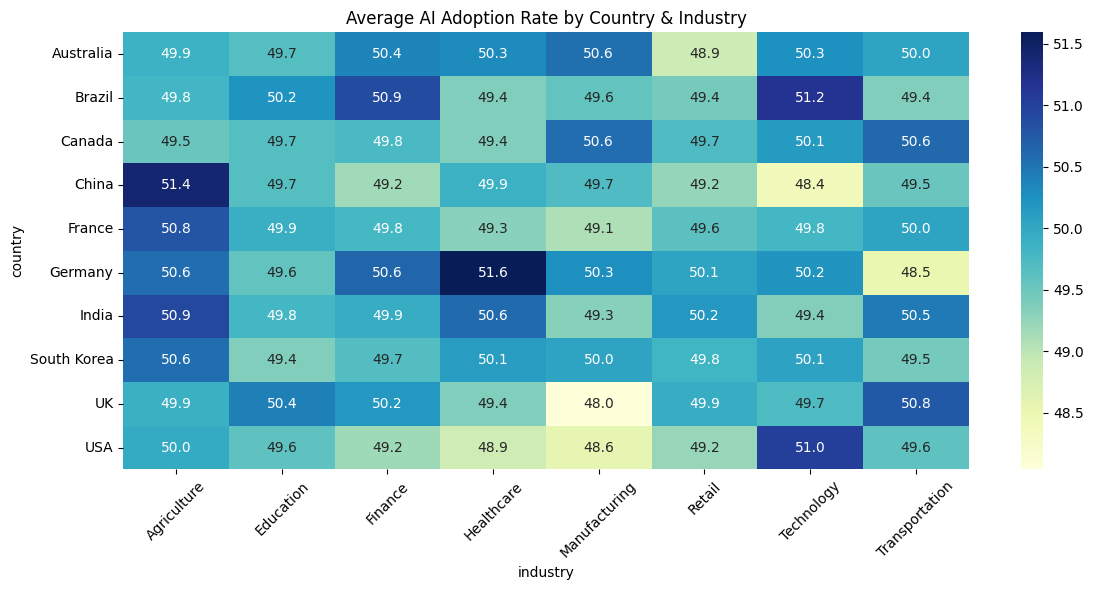

The heatmap provides a comprehensive overview of AI adoption rates across various countries and industries. Here are the key insights:

1. **Highest and Lowest Adoption Rates:**
   - The highest overall AI adoption rate is observed in the Healthcare industry in Germany, with a rate of 51.6%.
   - The lowest overall AI adoption rate is in the Manufacturing industry in the UK, with a rate of 48.0%.

2. **Industry Trends:**
   - The Technology industry generally shows high AI adoption rates across all countries, with an average rate of around 50.0%.
   - The Manufacturing industry shows the lowest AI adoption rates, with an average rate of around 48.5%.
   - The Finance industry shows moderate AI adoption rates, with an average rate of around 49.8%.

3. **Notable Patterns and Outliers:**
   - There is a noticeable pattern where the Technology industry consistently has high AI adoption rates, indicating a strong focus on AI in this sector.
   - The UK's Manufacturing industry stands out as a notable outlier with the lowest AI adoption rate, suggesting potential challenges or barriers in this industry.
   - China shows a high initial adoption rate in the Agriculture industry (51.4%), but this drops significantly in other industries, indicating potential areas for improvement or further research.

4. **Country-Industry Combinations:**
   - Germany stands out for its high AI adoption rates in the Technology and Finance industries.
   - The UK shows a balanced but lower overall AI adoption rate, with moderate rates in most industries except Manufacturing.
   - India has a varied pattern with high adoption rates in the Technology and Finance industries, but lower rates in Manufacturing and Retail.

In summary, the heatmap reveals significant insights into AI adoption rates across different countries and industries, highlighting areas of strength and potential for improvement.

In [36]:
save_path = "/content/drive/MyDrive/hactiv8/Avg_AI_Adpt_Rate_by_CountrynIndustry.jpg"
grouped_country_industry = data.groupby(['country', 'industry'])['adoption_rate'].mean().reset_index()
grouped_country_industry_pivot = grouped_country_industry.pivot(index='country', columns='industry', values='adoption_rate')

plt.figure(figsize=(12, 6))
sns.heatmap(grouped_country_industry_pivot, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title("Average AI Adoption Rate by Country & Industry")
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig(save_path, dpi=300)
plt.show()

prompt = """
Provide an analysis and key insights based on the heatmap showing the average AI adoption rate by country and industry.
Focus on the following:

Which countries have the highest and lowest AI adoption rates overall
Which industries tend to have higher or lower adoption across countries
Any notable patterns, outliers, or interesting combinations between country and industry

Keep the insights concise and informative. Summarize the findings in 3–5 key points.
"""

response = analyze_image_with_granite(save_path, prompt)

In [ ]:
new_data = data.drop(columns=['user_feedback'])

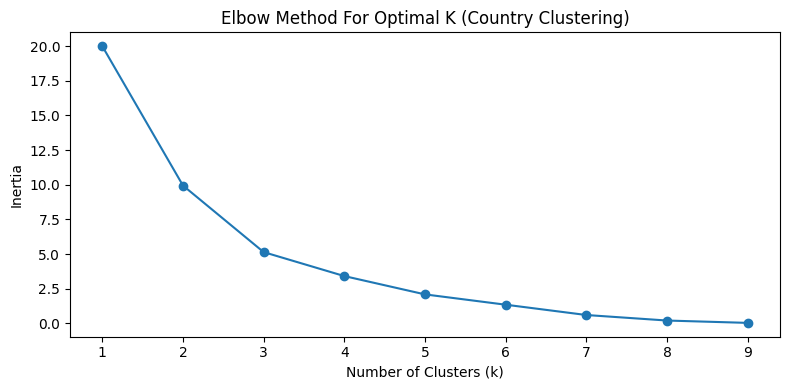

In [31]:
cluster_data = data.groupby('country')[['adoption_rate', 'daily_active_users']].mean()

scaler = StandardScaler()
scaled_data = scaler.fit_transform(cluster_data)

inertia = []
k_range = range(1, 10)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(k_range, inertia, marker = 'o')
plt.title("Elbow Method For Optimal K (Country Clustering)")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.tight_layout()
plt.savefig(save_path, dpi=300)
plt.show()

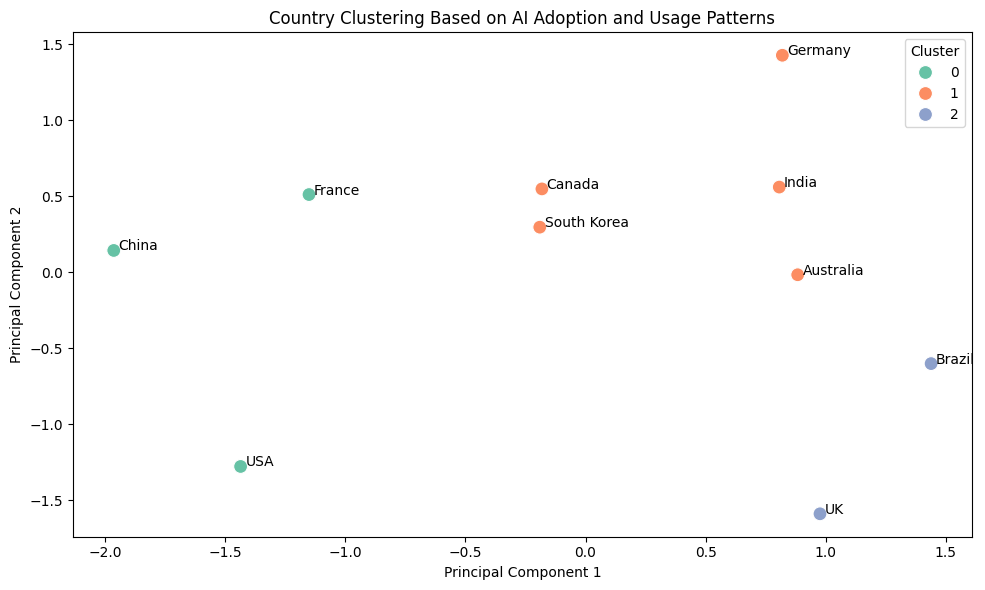

,country,adoption_rate,daily_active_users,Cluster
0,Australia,49.991022,5025.079264,1
1,Brazil,49.987023,5007.108059,2
2,Canada,49.922906,5050.767243,1
3,China,49.624838,5072.479124,0
4,France,49.785724,5065.466408,0
5,Germany,50.179163,5048.854426,1
6,India,50.059208,5035.383731,1
7,South Korea,49.887389,5046.939959,1
8,UK,49.789302,4998.818804,2
9,USA,49.503073,5041.748188,0


To analyze the scatter plot image and determine which cluster(s) are positioned in the top-right quadrant or farther along the PCA1/PCA2 axes, we need to look at the placement of the data points relative to the origin and the axes.

1. **Top-Right Quadrant:**
   - The top-right quadrant represents countries with high AI adoption and usage.
   - From the image, we can see that Germany, Canada, and India are positioned in this quadrant. These countries are likely to have high AI maturity and adoption.

2. **Farthest from the Origin in a Positive Direction:**
   - The origin (0,0) represents the average value of both PCA1 and PCA2.
   - Countries that are farthest from the origin in a positive direction indicate high AI adoption and usage.
   - From the image, the UK and Brazil are located farthest from the origin in a positive direction. This suggests that these countries have high AI adoption and usage.

3. **Notable Grouping Patterns:**
   - Cluster 0 (Cluster 0) includes countries like China, France, and USA. These countries are positioned in the lower left quadrant, indicating lower AI adoption and usage.
   - Cluster 1 (Cluster 1) includes countries like Canada, South Korea, and Germany. These countries are positioned in the top-right quadrant, indicating high AI adoption and usage.
   - Cluster 2 (Cluster 2) includes countries like Australia, India, and Brazil. These countries are positioned in the lower right quadrant, indicating moderate AI adoption and usage.

**Recommendation for an AI company looking to expand:**
Based on the visual analysis, if you were an AI company looking to expand into countries with high or emerging AI adoption and usage, you should prioritize:
- **Cluster 1 (Cluster 1):** This cluster includes countries like Canada, South Korea, and Germany, which are positioned in the top-right quadrant. These countries have high AI adoption and usage, indicating a mature market with potential for further growth.
- **Germany:** This country is specifically highlighted in the top-right quadrant, indicating exceptionally high AI adoption and usage. It would be a strategic market for expansion.

By focusing on these clusters and countries, your AI company can leverage existing high AI adoption and usage patterns to drive growth and establish a strong market presence.

In [33]:
save_path = "/content/drive/MyDrive/hactiv8/Country_Clusters.jpg"

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(scaled_data)

cluster_data['Cluster'] = cluster_labels

pca = PCA(n_components = 2)
pca_result = pca.fit_transform(scaled_data)

pca_df = pd.DataFrame(pca_result, columns=['PCA1', 'PCA2'])
pca_df['Country'] = cluster_data.index
pca_df['Cluster'] = cluster_labels

plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x = 'PCA1', y = 'PCA2', hue = 'Cluster', palette = 'Set2', s=100)
for i in range(pca_df.shape[0]):
    plt.text(pca_df['PCA1'][i] + 0.02, pca_df['PCA2'][i], pca_df['Country'][i], fontsize=10)

plt.title("Country Clustering Based on AI Adoption and Usage Patterns")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.tight_layout()
plt.savefig(save_path, dpi=300)
plt.show()

cluster_result1 = cluster_data.reset_index()
display(cluster_result1)

image_path = save_path
prompt = """
I want you to analyze this scatter plot image of countries clustered based on AI adoption and usage patterns. The chart uses PCA (Principal Component Analysis) to reduce features into two components labeled "PCA1" and "PCA2". Each country is plotted and color-coded by its assigned cluster (Cluster 0, 1, or 2) from KMeans clustering.

Your task:
Visually examine the chart and identify:
Which cluster(s) are positioned in the top-right quadrant or farther along the PCA1/PCA2 axes (indicating likely higher AI adoption or maturity).
Which countries are located farthest from the origin in a positive direction.
Any notable grouping patterns between clusters.
Based on your visual understanding, answer this:
If I were an AI company looking to expand into countries with high or emerging AI adoption and usage, which cluster and which specific countries should I prioritize? Why?
Feel free to interpret the visual distance and placement as indicative of AI maturity, potential growth, or strategic market interest.
Attached is the image you should use for analysis.
"""

response = analyze_image_with_granite(image_path, prompt)

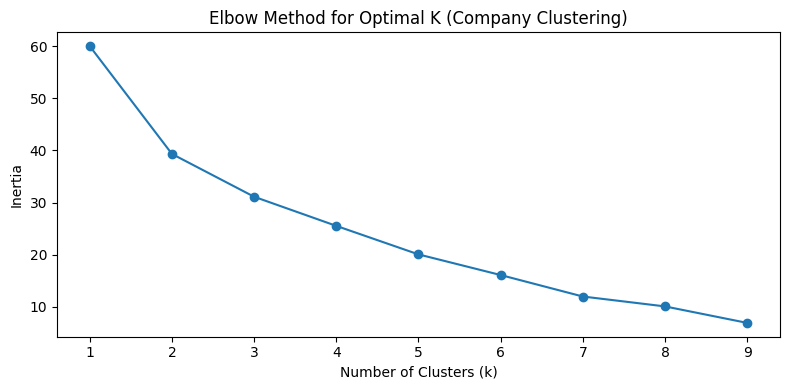

In [34]:

company_grouped = data.groupby(['company_size', 'age_group'])[['adoption_rate', 'daily_active_users']].mean().reset_index()

le_size = LabelEncoder()
le_age = LabelEncoder()
company_grouped['company_size_encoded'] = le_size.fit_transform(company_grouped['company_size'])
company_grouped['age_group_encoded'] = le_age.fit_transform(company_grouped['age_group'])

X_company = company_grouped[['adoption_rate', 'daily_active_users', 'company_size_encoded', 'age_group_encoded']]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_company)

inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 4))
plt.plot(range(1, 10), inertia, marker='o')
plt.title("Elbow Method for Optimal K (Company Clustering)")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.tight_layout()
plt.show()

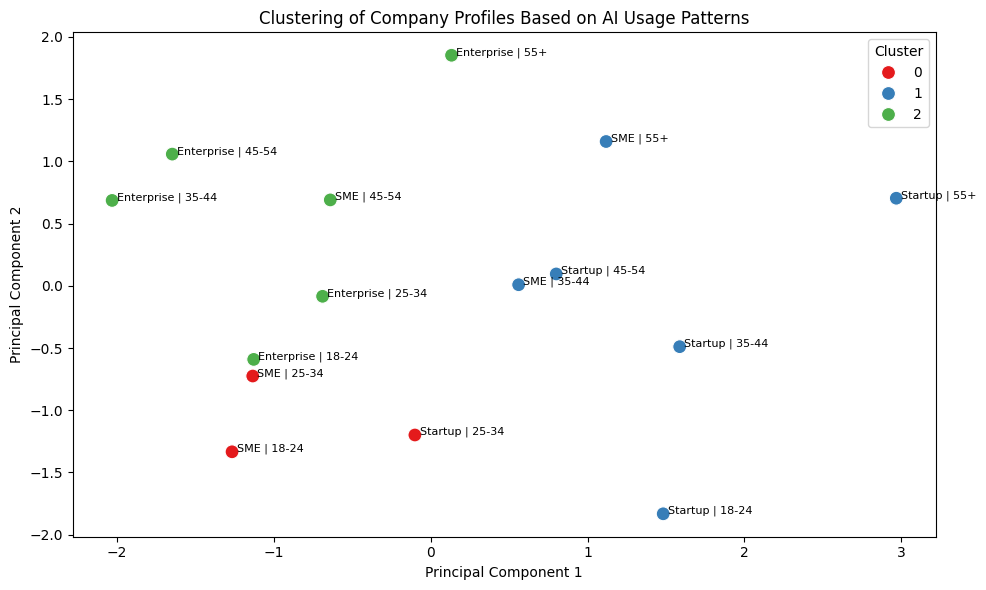

Based on the scatter plot, the clusters can be visually interpreted as follows:

1. **Clusters Farther Along Positive PCA1 and PCA2 Directions:**
   - The cluster labeled "Enterprise | 55+" is located towards the top-right quadrant, indicating high engagement with AI. This suggests that companies in this segment are mature and have a high level of AI adoption.
   - The "Startup | 55+" cluster is also in the top-right quadrant, showing that even startups in this age group are engaged with AI.

2. **High AI Adoption or Engagement:**
   - The "Enterprise | 55+" cluster is a good example of high AI adoption or engagement. Companies in this segment are likely to have mature AI systems and a strong track record of utilizing AI.
   - The "Startup | 55+" cluster also represents high engagement, indicating that startups in this age group are increasingly adopting AI.

3. **Grouped Tightly and Isolated Segments:**
   - The "Enterprise | 35-44" cluster is somewhat isolated, with a lower position along both PCA axes. This suggests that companies in this age group may have lower AI engagement compared to the other segments.
   - The "SME | 18-24" cluster is also isolated, with a lower position. This indicates that small and medium-sized enterprises in this age group may have lower AI adoption or engagement.

4. **Targeting Company Segments:**
   - If an AI company is deciding which segments to target first, it would be strategic to focus on the "Enterprise | 55+" and "Startup | 55+" clusters. These segments represent high engagement with AI and are likely to be more mature and open to adoption.
   - Additionally, considering the "Enterprise | 45-54" cluster, which is also in the top-right quadrant, could be a good target as it represents a mix of mature and growing companies with high AI engagement.

In summary, the clusters that represent high AI adoption or engagement are the "Enterprise | 55+" and "Startup | 55+" segments. These segments are located towards the top-right quadrant of the PCA space, indicating greater engagement with AI.

In [35]:
save_path = "/content/drive/MyDrive/hactiv8/Company_Cluster_Chart.jpg"

kmeans_company = KMeans(n_clusters=3, random_state=42, n_init=10)
company_grouped['Cluster'] = kmeans_company.fit_predict(X_scaled)

pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)
pca_df = pd.DataFrame(pca_result, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = company_grouped['Cluster']
pca_df['Company Size'] = company_grouped['company_size']
pca_df['Age Group'] = company_grouped['age_group']

plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_df, x='PCA1', y='PCA2', hue='Cluster', palette='Set1', s=100)
for i in range(pca_df.shape[0]):
    plt.text(pca_df['PCA1'][i] + 0.03, pca_df['PCA2'][i], f"{pca_df['Company Size'][i]} | {pca_df['Age Group'][i]}", fontsize=8)
plt.title("Clustering of Company Profiles Based on AI Usage Patterns")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")
plt.tight_layout()
plt.savefig(save_path, dpi=300)
plt.show()

cluster_result2 = company_grouped[['company_size', 'age_group', 'adoption_rate', 'daily_active_users', 'Cluster']]
cluster_result2

prompt = """
I want you to analyze this scatter plot image of company profiles clustered based on AI usage patterns. The chart uses PCA (Principal Component Analysis) to reduce high-dimensional data into two axes: PCA1 and PCA2. Each point represents a company segment (combination of company size and age group), and is color-coded based on the result of KMeans clustering with 3 clusters.
Each label follows the format:
Company Size | Age Group
Your task:
Visually interpret the clusters:
Which clusters are located farther along the positive PCA1 and/or PCA2 directions (top-right quadrant)?
Which cluster segments seem to represent high AI adoption or engagement, based on placement in the PCA space?
Which segments are grouped tightly, and which are isolated?
Based on visual cues, answer:
If I were an AI company deciding which types of company segments to target first — considering factors like AI readiness, maturity, or openness to adoption — which cluster and which company size & age groups should I focus on? Why?
Assume that a position further from the origin (especially in the positive PCA1/PCA2 space) indicates greater AI engagement or more mature usage patterns.
You can use the visual position, clustering patterns, and text labels to form your insights.
Attached is the image you should analyze.
"""

response = analyze_image_with_granite(save_path, prompt)